<a href="https://colab.research.google.com/github/12A-A12/MAT-422/blob/main/MAT422_1.2_Elements_of_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2 Elements of Linear Algebra

There are various concepts which will be explored in the following examples which all provide insight into the various processes and concepts in Linear Algebra with a focus primarily on the main elements which are as follows:
- Linear Spaces and Linear Combinations
- Linear Independence and Dimension
- Orthogonality, Orthonormal Bases, and
  Best Approximation Theorem
- Gram-Schmidt Process
- Eigenvalues and Eigenvectors
- Diagonlization of Symmetric Matrices
- Constrained Optimzation

Note: Example problems generated by author

# Linear Spaces and Linear Combinations

A linear combination is described as a new vector which is derived by multiplying a consant with each vector obtained from a subset and adding the final results. The result from this is a linear subspace which is obtained from the linear combination.

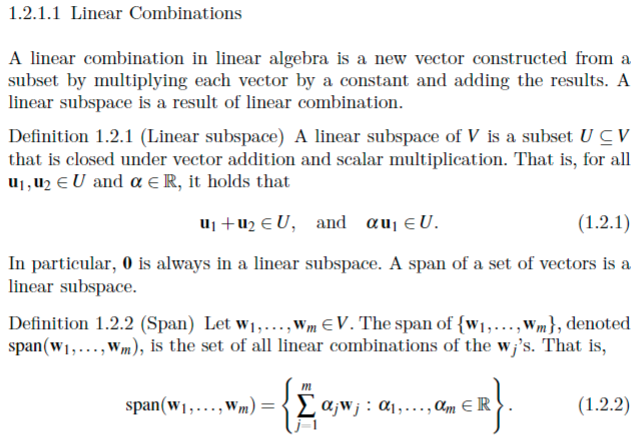

In [ ]:
# Linear Spaces
u1 = np.array([1, 2, 3])
u2 = np.array([0, 5, 5])

U = u1+u2

sigma = 5
U2 = sigma*u1

print('The subspace U with vector addition is', U)
print('The subspace U with scalar multiplication is', U2)
print("Both of these vectors are in U")

# Linear Combination
print('The given vectors are', u1, u2)
sumlc = 8*U + 5*U2;
print("Span of vectors is R^2 for 8x+5y")
print(sumlc)

The subspace U with vector addition is [1 7 8]
The subspace U with scalar multiplication is [ 5 10 15]
Both of these vectors are in U
The given vectors are [1 2 3] [0 5 5]
Span of vectors is R^2 for 8x+5y
[ 33 106 139]


Shown above is an example showing the subspace U when there is vector addition and scalar multiplication. After this an example of linear combination is shown which is a collection of values obtained from using the previously obtained subspaces. Lastly an example of the span is shown with the linear combinations being shown as a colleciton of vectors.

# Linear Independence and Dimension

In order to avoid redundancy in solutions and the description of a subspace the dimensions of a linear spaces are essential.
Linear Independence is a list of vectors which are linearly independent from one another, and this dependency can be determined based off the list of the vectors.
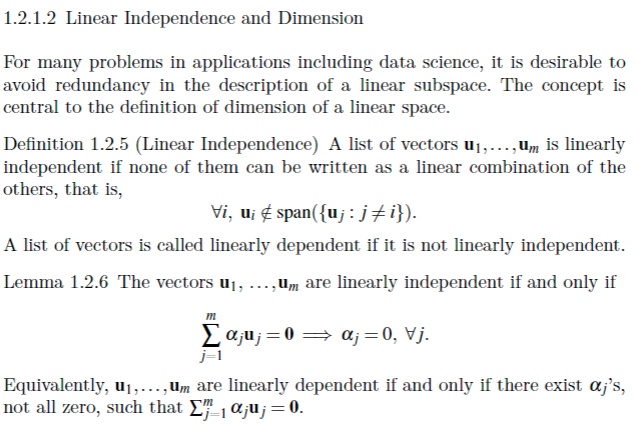

In [ ]:
# Linear Dependency
u1 = np.array([1, 2, 3])
u2 = np.array([0, 5, 5])
u3 = np.array([0, 0, 5])
U = (u1,u2,u3)

def dependency(U):
  matrix = np.vstack(U).T
  inds = np.linalg.det(matrix)

independent = dependency(U)

if independent:
    print("vectors are linearly independent")
else:
    print("vectors are linearly dependent")

# Rank and Dimension
U = np.vstack((u1, u2, u3))

rows, cols = U.shape
dimension = (rows, cols)

rank = np.linalg.matrix_rank(U)

print(U)
print("Dimension:", dimension)
print("Rank:", rank)


The vectors are linearly dependent.
[[1 2 3]
 [0 5 5]
 [0 0 5]]
Dimension: (3, 3)
Rank: 3


Using a dependency criteria, the dependency of the matrix was determined which was found to be linearly dependent. After which the rank,  which is the dimension spanned by the vectors columns was found. Along with this the dimension, the number of rows against the number of columns was also determined.

# Orthogonality, Orthonormal Bases, and Best Approximation Theorem

The utilization of orthonormal bases can simplify varius mathematical representations for many problems, and is a large aspect in the overall topic of Orthogonality.

Orthonormal bases are used for determining normalized orthogonal coordinates on a vector, and a basis can be found to be orthonormal assuming the vectors have a norm/length of 1 and are orthogonal.

The Best Approximation Theorem is an optimization application which can be used to find the vector in a linear subspace to find a subspace which is closest to the vector in the norm.
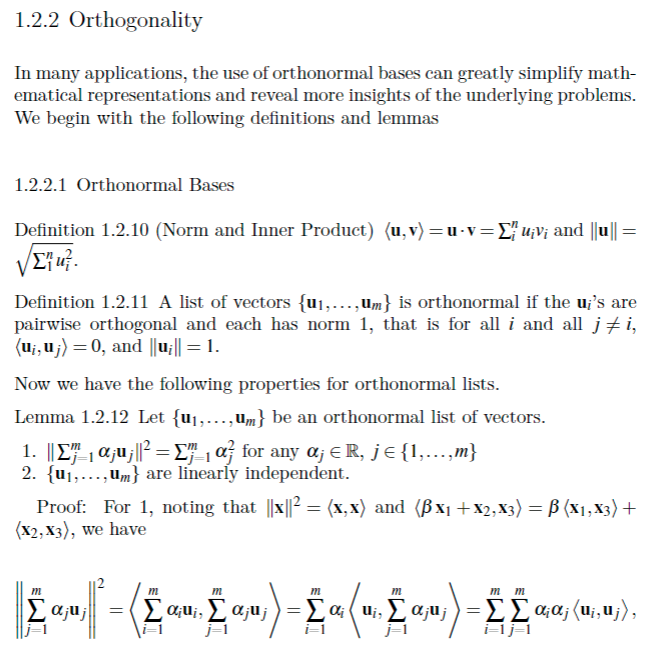

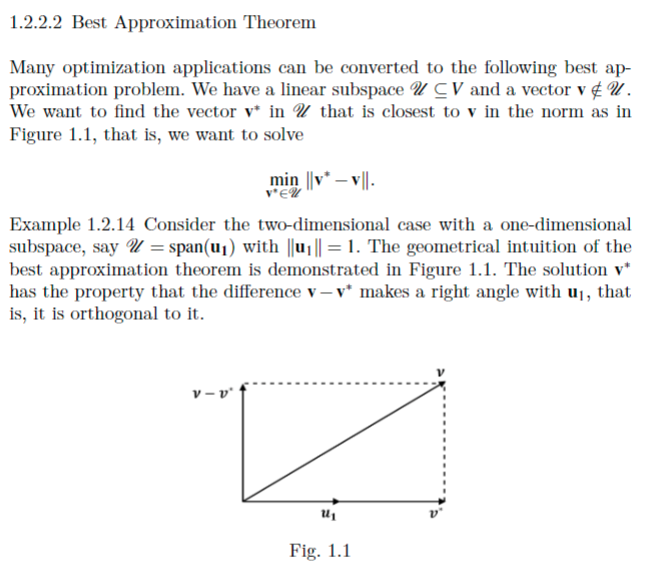

25 25 15
The vectors are not orthogonal.
25 equal to 25
5.0 equal to 3.7416573867739413


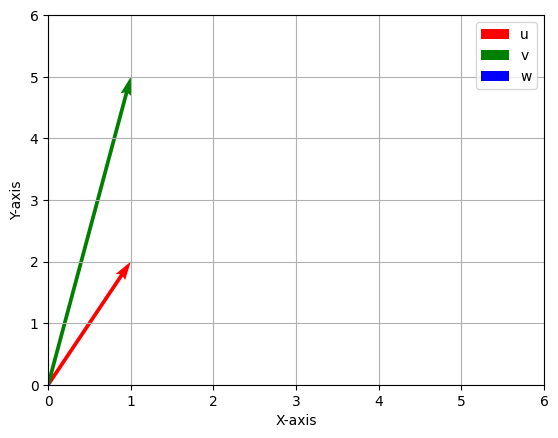

In [ ]:
# Orthogonality
u1 = np.array([1, 2, 3])
u2 = np.array([0, 5, 5])
u3 = np.array([0, 0, 5])
U = (u1,u2,u3)

u1u2 = np.dot(u1,u2)

u2u3 = np.dot(u2,u3)

u1u3 = np.dot(u1,u3)

print(u1u2,u2u3,u1u3)

if u1u2 == 0 and u2u3 == 0 and u1u3 == 0:
    print("The vectors are orthogonal.")
else:
    print("The vectors are not orthogonal.")

# Orthonormal Bases

u = np.array([1, 2, 3])
v = np.array([0, 5, 5])

norm = np.dot(u,v)
inside = abs(np.dot(u,v))

print(norm,'equal to',inside)

norm2 = np.sqrt(np.dot(u,v))
inside2 = np.linalg.norm(u)
print(norm2,'equal to',inside2)


# Best Approximation Theorem

u = np.array([np.sqrt(1),2,3])
v = np.array([np.sqrt(1),5,5])
w = np.array([0,0,5])

sum = np.array([u,v,w])

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', label='u')
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='g', label='v')
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='b', label='w')

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()

plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

Above shows examples for Orthogonality, orthonormal bases, and best approximation theorem. In order to satisfy and determine orthogonality, the dot products of all the vectors against each other must be 0, which if they are, then the vector will be orthogonal. For orthonormal bases, the equations are used to determine if they are equal, which they are not. Lastly the best approximation theorem is used in order to determine the ideal values fo approximating the values from the vectors.

# Gram-Schmidt Process

The Gram-Schmidt Processs can be used to determine orthonormal basis with the process involving the evaluation of linear dependency as well as orthogonality in order to determine the bases.
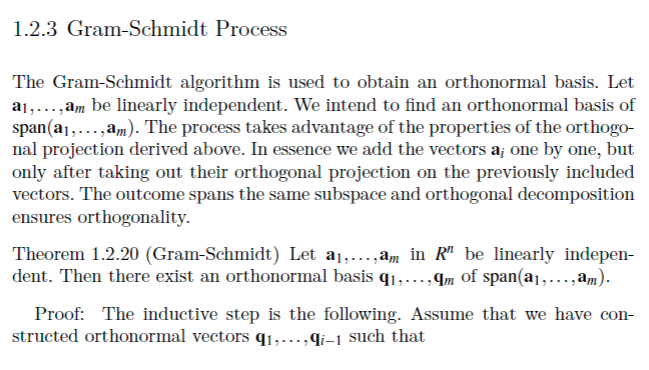

In [ ]:
u1 = np.array([1, 2, 3])
u2 = np.array([0, 5, 5])
u3 = np.array([0, 0, 5])
U = (u1,u2,u3)
U2 = np.array(U)

np.linalg.norm(U)

product = U2/np.linalg.norm(U)

print("Vector is", product)
print("The vector U is not orthonormal")


Vector is [[0.10599979 0.21199958 0.31799936]
 [0.         0.52999894 0.52999894]
 [0.         0.         0.52999894]]
The vector U is not orthonormal


# Eigenvalues and Eigenvectors

Eigenvalues are sets of scalars which are related to a linear system of equations which allows for the characterization of a vector.

An eigenvector is a vector which is a vector that has an unchanged direction when a linear transformation is performed.

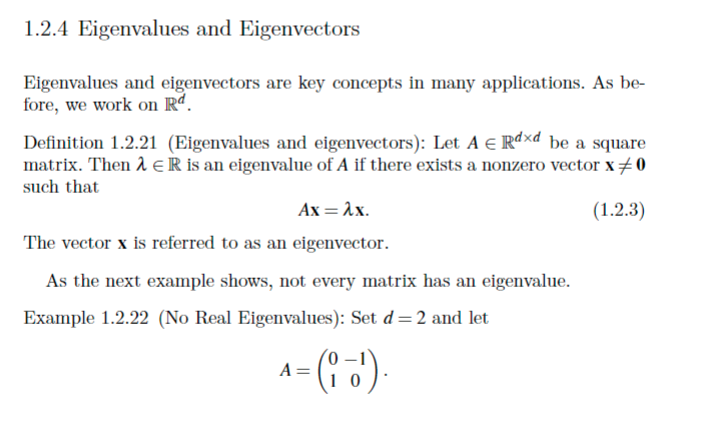

In [ ]:
u1 = np.array([1, 2, 3])
u2 = np.array([0, 5, 5])
u3 = np.array([0, 0, 5])
U = (u1,u2,u3)

eigenvalues, eigenvectors = np.linalg.eig(U)

print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[1. 5. 5.]
Eigenvectors:
[[ 1.00000000e+00  4.47213595e-01 -4.47213595e-01]
 [ 0.00000000e+00  8.94427191e-01 -8.94427191e-01]
 [ 0.00000000e+00  0.00000000e+00  1.98602732e-16]]


# Diagonlization of Symmetric Matrices

The process of diagonlization and orthgonality conditions can be used to create symmetric matrices, of which these symmetric matrices yields properties such as real eigenvalues, eigenspaces being mutually orthogonal, and being orthogonally diagonalizable.

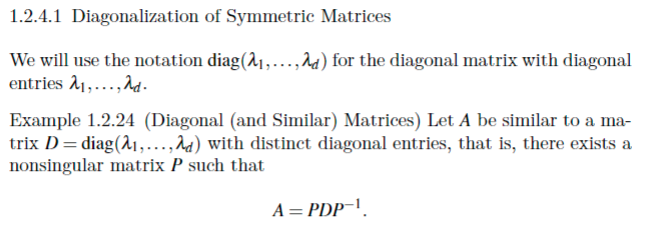

In [ ]:
u1 = np.array([1, 2, 3])
u2 = np.array([0, 5, 5])
u3 = np.array([0, 0, 5])
U = np.column_stack((u1,u2,u3))

eigenvalues, eigenvectors = np.linalg.eig(U)

D = np.diag(eigenvalues)

P = eigenvectors

Pinv= np.linalg.inv(eigenvectors)

A = P*D*Pinv
print(A)

print("Matrix is not Diagonalizable")

[[ 0.  0.  0.]
 [ 0.  5. -0.]
 [ 0. -0. -0.]]
Matrix is not Diagonalizable


# Constrained Optimzation

Constrained Optimization is a useful optimization technique which can be used for symmetric matrices and can be used by setting a minimum and maximum value or with respect to a variable to obtain the ideal optimized solution.

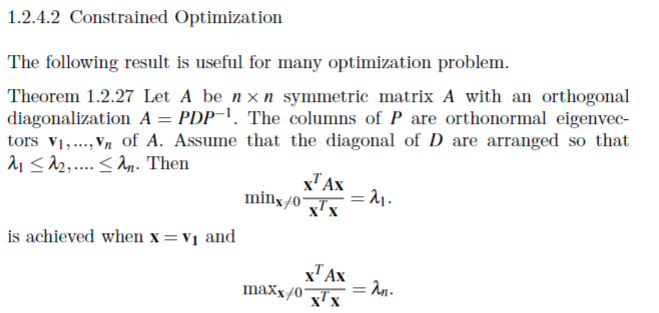


In [ ]:
from scipy.optimize import minimize
# Ideal value desired
def objective(x):

# Constraint 1
def constraint(x):

# Constraint 2
def constraint2(x):

# Initial Conditions
x0 = [0, 0]

# Constraint Bounds
bounds = [(0, 0), (5, 5)]

result = minimize(objective, x0, constraints=[constraint, constraint2], bounds=bounds)

# Print Results

Sample code attached above for overall process as to how to incorporate this optimization.

References:

1. Ren, Jingli, and Haiyan Wang. Mathematical Methods in Data Science. Elsevier, 2023.